![im1](im1.png)
![im2](im2.png)
![im3](im3.png)
![im4](im4.png)
![im5](im5.png)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display='diagram')

In [104]:
df1 = pd.read_csv('titanic.csv', index_col=0)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Signing_date
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1911-05-17
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1911-07-23
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1911-09-08
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1911-06-26
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1911-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1911-08-17
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1911-08-07
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1912-01-30


In [105]:
df = df1.drop(columns = ['Signing_date','Cabin','Ticket','Name'])

X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [106]:
## Haciendo un Modelo Baseline: Modelo base para ir haciendole mejoras...

prep = Pipeline(steps = [
    ('cat_imp', CategoricalImputer(imputation_method='frequent')),
    ('num_imp', MeanMedianImputer(imputation_method='mean')),
    ('cat_enc', OneHotEncoder()),
    ('sc', SklearnTransformerWrapper(StandardScaler(),variables=['Age','Fare','SibSp','Parch']))
])

prep.fit_transform(X_train)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
417,2,0.323710,0.422790,0.809104,-0.015230,1,0,1,0,0
802,2,0.087673,0.422790,0.809104,-0.130344,1,0,1,0,0
513,1,0.481069,-0.452286,-0.467027,-0.129653,0,1,1,0,0
456,3,-0.069685,-0.452286,-0.467027,-0.468397,0,1,0,1,0
758,2,-0.935156,-0.452286,-0.467027,-0.402014,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
99,2,0.323710,-0.452286,0.809104,-0.190203,1,0,1,0,0
323,2,0.008994,-0.452286,-0.467027,-0.386358,1,0,0,0,1
383,3,0.166352,-0.452286,-0.467027,-0.467859,0,1,1,0,0


In [107]:
def train_evaluate_model(pipe, X_train, X_test, y_train, y_test):
    pipe.fit(X_train, y_train)
    y_pred_train = pipe.predict(X_train)
    y_pred = pipe.predict(X_test)
    print('Train prediction results')
    print(classification_report(y_train, y_pred_train, digits=4))
    print('Test prediction results')
    print(classification_report(y_test, y_pred, digits=4))
    return pipe


In [108]:
## Logistic Regression

pipe_lr = Pipeline(steps=[
    ('prep', prep),
    ('model', LogisticRegression(C = 0.015, random_state=123))
])
train_evaluate_model(pipe_lr, X_train, X_test, y_train, y_test)


Train prediction results
              precision    recall  f1-score   support

           0     0.7646    0.9340    0.8409       379
           1     0.8438    0.5533    0.6683       244

    accuracy                         0.7849       623
   macro avg     0.8042    0.7437    0.7546       623
weighted avg     0.7956    0.7849    0.7733       623

Test prediction results
              precision    recall  f1-score   support

           0     0.8071    0.9353    0.8665       170
           1     0.8451    0.6122    0.7101        98

    accuracy                         0.8172       268
   macro avg     0.8261    0.7738    0.7883       268
weighted avg     0.8210    0.8172    0.8093       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp',
                                  CategoricalImputer(imputation_method='frequent')),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('cat_enc', OneHotEncoder()),
                                 ('sc',
                                  SklearnTransformerWrapper(transformer=StandardScaler(),
                                                            variables=['Age',
                                                                       'Fare',
                                                                       'SibSp',
                                                                       'Parch']))])),
                ('model', LogisticRegression(C=0.015, random_state=123))])

In [109]:
from sklearn.ensemble import BaggingClassifier ## MetaEstimador...

pipe_bg = Pipeline(steps=[
    ('prep', prep),
    ('model', BaggingClassifier(
        base_estimator = LogisticRegression(),
        random_state=123,
        n_estimators=20,
        n_jobs=-1,
        max_samples=0.8, # restringir la cantidad de filas en cada modelo
        max_features=0.6 # restringir la cantidad de columnas en cada modelo
        )) # C chico implica ir regularizando
    ])

train_evaluate_model(pipe_bg, X_train, X_test, y_train, y_test)

Train prediction results
              precision    recall  f1-score   support

           0     0.8101    0.8443    0.8269       379
           1     0.7412    0.6926    0.7161       244

    accuracy                         0.7849       623
   macro avg     0.7757    0.7685    0.7715       623
weighted avg     0.7831    0.7849    0.7835       623

Test prediction results
              precision    recall  f1-score   support

           0     0.8192    0.8529    0.8357       170
           1     0.7253    0.6735    0.6984        98

    accuracy                         0.7873       268
   macro avg     0.7722    0.7632    0.7671       268
weighted avg     0.7849    0.7873    0.7855       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp',
                                  CategoricalImputer(imputation_method='frequent')),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('cat_enc', OneHotEncoder()),
                                 ('sc',
                                  SklearnTransformerWrapper(transformer=StandardScaler(),
                                                            variables=['Age',
                                                                       'Fare',
                                                                       'SibSp',
                                                                       'Parch']))])),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(),
                                   max_features=0.6, max_samples=0.8,
                                   n_estimators=20, n_jobs=-1,
                                   random_state=123))])

## Teorema del No free lunch:
    ## No hay un algoritmo que pueda resolver todos los problemas, ni varios problemas que se puedan resolver con solo un algoritmo...   

In [110]:
pipe_bg_dt = Pipeline(steps=[
    ('prep', prep),
    ('model', DecisionTreeClassifier(
        random_state=123
        ))
    ])

train_evaluate_model(pipe_bg_dt, X_train, X_test, y_train, y_test)


Train prediction results
              precision    recall  f1-score   support

           0     0.9843    0.9947    0.9895       379
           1     0.9917    0.9754    0.9835       244

    accuracy                         0.9872       623
   macro avg     0.9880    0.9851    0.9865       623
weighted avg     0.9872    0.9872    0.9871       623

Test prediction results
              precision    recall  f1-score   support

           0     0.8625    0.8118    0.8364       170
           1     0.7037    0.7755    0.7379        98

    accuracy                         0.7985       268
   macro avg     0.7831    0.7936    0.7871       268
weighted avg     0.8044    0.7985    0.8003       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp',
                                  CategoricalImputer(imputation_method='frequent')),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('cat_enc', OneHotEncoder()),
                                 ('sc',
                                  SklearnTransformerWrapper(transformer=StandardScaler(),
                                                            variables=['Age',
                                                                       'Fare',
                                                                       'SibSp',
                                                                       'Parch']))])),
                ('model', DecisionTreeClassifier(random_state=123))])

In [111]:
pipe_bg_dt = Pipeline(steps=[
    ('prep', prep),
    ('model', BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        random_state=123,
        n_estimators=100,
        n_jobs=-1,
        max_samples=0.7, # restringir la cantidad de filas en cada modelo
        max_features=0.6 # restringir la cantidad de columnas en cada modelo
        )) # C chico implica ir regularizando
    ])

train_evaluate_model(pipe_bg_dt, X_train, X_test, y_train, y_test)   ## Regularizador... RANDOM FOREST (NO OFICIAL)

Train prediction results
              precision    recall  f1-score   support

           0     0.9163    0.9815    0.9478       379
           1     0.9677    0.8607    0.9111       244

    accuracy                         0.9342       623
   macro avg     0.9420    0.9211    0.9294       623
weighted avg     0.9364    0.9342    0.9334       623

Test prediction results
              precision    recall  f1-score   support

           0     0.8681    0.9294    0.8977       170
           1     0.8605    0.7551    0.8043        98

    accuracy                         0.8657       268
   macro avg     0.8643    0.8423    0.8510       268
weighted avg     0.8653    0.8657    0.8636       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp',
                                  CategoricalImputer(imputation_method='frequent')),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('cat_enc', OneHotEncoder()),
                                 ('sc',
                                  SklearnTransformerWrapper(transformer=StandardScaler(),
                                                            variables=['Age',
                                                                       'Fare',
                                                                       'SibSp',
                                                                       'Parch']))])),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   max_features=0.6, max_samples=0.7,
                                   n_estimators=100, n_jobs=-1,
                                   random_state=123))])

In [112]:
pipe_rf = Pipeline(steps=[
    ('prep', prep),
    ('model', RandomForestClassifier(
        n_estimators=100,
        random_state=123,
        n_jobs=-1
        ))
    ])

train_evaluate_model(pipe_rf, X_train, X_test, y_train, y_test)


Train prediction results
              precision    recall  f1-score   support

           0     0.9920    0.9868    0.9894       379
           1     0.9797    0.9877    0.9837       244

    accuracy                         0.9872       623
   macro avg     0.9859    0.9873    0.9865       623
weighted avg     0.9872    0.9872    0.9872       623

Test prediction results
              precision    recall  f1-score   support

           0     0.8430    0.8529    0.8480       170
           1     0.7396    0.7245    0.7320        98

    accuracy                         0.8060       268
   macro avg     0.7913    0.7887    0.7900       268
weighted avg     0.8052    0.8060    0.8055       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp',
                                  CategoricalImputer(imputation_method='frequent')),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('cat_enc', OneHotEncoder()),
                                 ('sc',
                                  SklearnTransformerWrapper(transformer=StandardScaler(),
                                                            variables=['Age',
                                                                       'Fare',
                                                                       'SibSp',
                                                                       'Parch']))])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=123))])

In [113]:
params = {
    'model__n_estimators': [50, 100, 200, 300, 500],  # hp poderoso, tiempo de entrenamiento...
    'model__max_depth': [1, 5, 8, 10]
}

search = GridSearchCV(pipe_rf, params, cv = 5, scoring='accuracy', n_jobs=-1)
search = train_evaluate_model(search, X_train, X_test, y_train, y_test)


Train prediction results
              precision    recall  f1-score   support

           0     0.8425    0.9314    0.8847       379
           1     0.8725    0.7295    0.7946       244

    accuracy                         0.8523       623
   macro avg     0.8575    0.8305    0.8397       623
weighted avg     0.8543    0.8523    0.8494       623

Test prediction results
              precision    recall  f1-score   support

           0     0.8424    0.9118    0.8757       170
           1     0.8214    0.7041    0.7582        98

    accuracy                         0.8358       268
   macro avg     0.8319    0.8079    0.8170       268
weighted avg     0.8347    0.8358    0.8328       268



In [114]:
search.best_params_  # los que generalizan mejor... los que me dan mejores resultados en cualquier dataset...

{'model__max_depth': 5, 'model__n_estimators': 300}

In [115]:
pipe_rf = Pipeline(steps=[
    ('prep', prep),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=123,
        max_depth=10,
        n_jobs=-1
    ))
])

train_evaluate_model(pipe_rf, X_train, X_test, y_train, y_test)


Train prediction results
              precision    recall  f1-score   support

           0     0.9373    0.9868    0.9614       379
           1     0.9777    0.8975    0.9359       244

    accuracy                         0.9518       623
   macro avg     0.9575    0.9422    0.9487       623
weighted avg     0.9531    0.9518    0.9514       623

Test prediction results
              precision    recall  f1-score   support

           0     0.8611    0.9118    0.8857       170
           1     0.8295    0.7449    0.7849        98

    accuracy                         0.8507       268
   macro avg     0.8453    0.8283    0.8353       268
weighted avg     0.8496    0.8507    0.8489       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp',
                                  CategoricalImputer(imputation_method='frequent')),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('cat_enc', OneHotEncoder()),
                                 ('sc',
                                  SklearnTransformerWrapper(transformer=StandardScaler(),
                                                            variables=['Age',
                                                                       'Fare',
                                                                       'SibSp',
                                                                       'Parch']))])),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        n_jobs=-1, random_state=123))])

In [116]:
##  LA mejor librería para "GRIDSEARCH DE OTRA FORMA" es OPTUNA (optuna.org)

In [135]:
fi = pipe_rf.named_steps.model.feature_importances_    # Importancia de Variables ... que me permiten indicar el protagonismo de la variable al momento de entrenar...
fi_search = search.best_estimator_.named_steps.model.feature_importances_   

In [131]:
feature_names = prep.named_steps.sc.get_feature_names_out()

<AxesSubplot:>

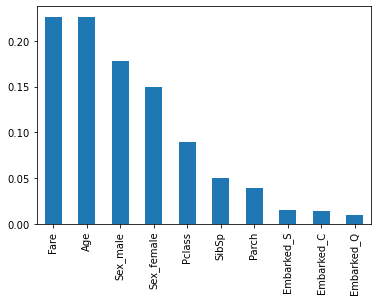

In [134]:
pd.Series(fi, index=feature_names).sort_values(ascending=False).plot(kind='bar')
## Warning!! Importancia está basada en el Gini...

<AxesSubplot:>

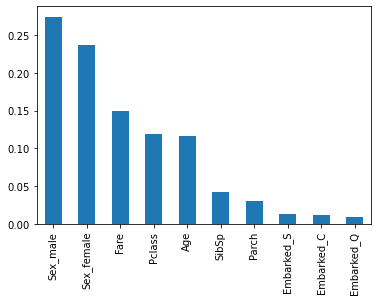

In [136]:
pd.Series(fi_search, index=feature_names).sort_values(ascending=False).plot(kind='bar')

In [137]:
from sklearn.inspection import permutation_importance

In [140]:
result = permutation_importance(search, X, y, n_repeats=10,random_state=123)
result

{'importances_mean': array([0.04769921, 0.22188552, 0.04567901, 0.01111111, 0.00213244,
        0.01503928, 0.0047138 ]),
 'importances_std': array([0.00333883, 0.01396438, 0.00772782, 0.00226978, 0.00093228,
        0.00297789, 0.00249956]),
 'importances': array([[0.04489338, 0.04713805, 0.04264871, 0.04489338, 0.04713805,
         0.04601571, 0.04938272, 0.04938272, 0.05050505, 0.05499439],
        [0.21661055, 0.22334456, 0.20763187, 0.21997755, 0.25028058,
         0.22446689, 0.22895623, 0.21885522, 0.1952862 , 0.23344557],
        [0.05948373, 0.04264871, 0.05050505, 0.04826038, 0.04489338,
         0.05274972, 0.03928171, 0.04601571, 0.0291807 , 0.04377104],
        [0.01122334, 0.00897868, 0.01571268, 0.01122334, 0.00673401,
         0.01122334, 0.01346801, 0.01122334, 0.01010101, 0.01122334],
        [0.00224467, 0.00224467, 0.00224467, 0.00224467, 0.003367  ,
         0.00224467, 0.003367  , 0.        , 0.00112233, 0.00224467],
        [0.01459035, 0.01683502, 0.01346801, 0.

<AxesSubplot:>

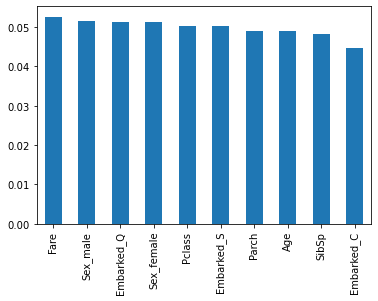

In [149]:
pd.Series(result['importances'].mean(axis=0), index=feature_names).sort_values(
    ascending=False).plot(kind='bar')
